Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8037 - loss: 0.6989 - val_accuracy: 0.9377 - val_loss: 0.2255
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9392 - loss: 0.2112 - val_accuracy: 0.9539 - val_loss: 0.1549
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9559 - loss: 0.1477 - val_accuracy: 0.9585 - val_loss: 0.1362
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9656 - loss: 0.1150 - val_accuracy: 0.9666 - val_loss: 0.1109
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9735 - loss: 0.0919 - val_accuracy: 0.9711 - val_loss: 0.0963
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9760 - loss: 0.0795 - val_accuracy: 0.9724 - val_loss: 0.0858
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9809 - loss: 0.0647 - val_accuracy: 0.9728 - val_loss: 0.0824
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9837 - loss: 0.05

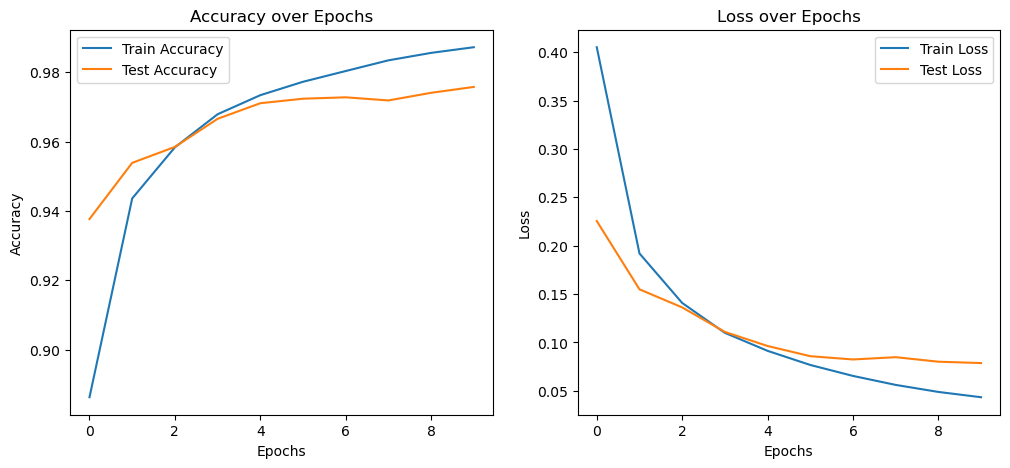

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and prepare the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(optimizer='sgd',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_test, y_test))

# Plot the accuracy and loss for training and testing data
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
